## Multinomial Naive Bayes

In [1]:
import pandas as pd

df = pd.read_csv('Dados/twitter.csv')
df

,classification,label,tweets_pt,tweets_en,pt_lemma,en_lemma,pt_tokens,en_tokens
0,Normal,2,mayasolovely como mulher você não deve reclama...,mayasolovely woman shouldnt complain cleanin...,mayasolovelyr como mulher você não dever recla...,mayasolovely woman should not complain clea...,"['mayasolovelyr', 'como', 'mulher', 'você', 'n...","['mayasolovely', 'woman', 'should', 'not', 'co..."
1,Offensive,1,menino dats frio tyga dwn ruim para cuffin da...,boy dats coldtyga dwn bad cuffin dat hoe place,menino dats frio tyga dwn ruim para cuffin d...,boy dat coldtyga dwn bad cuffin dat hoe place,"['menino', 'dats', 'frio', 'tyga', 'dwn', 'rui...","['boy', 'dat', 'coldtyga', 'dwn', 'bad', 'cuff..."
2,Offensive,1,urkindofbrand cara você fodeu uma cadela e...,urkindofbrand dawg ever fuck bitch start c...,urkindofbrand cara você foder um cadela ...,urkindofbrand dawg ever fuck bitch start ...,"['urkindofbrand', 'cara', 'você', 'foder', 'um...","['urkindofbrand', 'dawg', 'ever', 'fuck', 'bit..."
3,Offensive,1,cganderson vivabased ela parece uma travesti,cganderson vivabased look like tranny,Cganderson Vivabased ela parecer um travesti,cganderson vivabase look like tranny,"['Cganderson', 'Vivabased', 'ela', 'parecer', ...","['cganderson', 'vivabase', 'look', 'like', 'tr..."
4,Offensive,1,shenikaroberts merda que você ouve sobre mim ...,shenikaroberts shit hear might true might ...,shenikarobert merdar que você ouve sobre eu ...,shenikarobert shit hear might true migh...,"['shenikarobert', 'merdar', 'que', 'você', 'ou...","['shenikarobert', 'shit', 'hear', 'might', 'tr..."
...,...,...,...,...,...,...,...,...
24771,Offensive,1,você filho puta mentira coreyemanuel cer...,yous muthafin lie coreyemanuel right tras...,você filho puta mentira coreyemanuel...,yous muthafin lie coreyemanuel right t...,"['você', 'filho', 'puta', 'mentira', 'coreyema...","['yous', 'muthafin', 'lie', 'coreyemanuel', 'r..."
24772,Normal,2,você foi quebrou coração errado baby deixo...,youve gone broke wrong heart baby drove redne...,você ser quebrar coração errar Baby dei...,you ve go break wrong heart baby drive redne...,"['você', 'ser', 'quebrar', 'coração', 'errar',...","['you', 've', 'go', 'break', 'wrong', 'heart',..."
24773,Offensive,1,jovem fanfarrão quer comer esse mano como ...,young buck wanna eat dat nigguh like aint fuc...,jovem fanfarr querer comer esse mano como ...,young buck wanna eat dat nigguh like be not ...,"['jovem', 'fanfarr', 'querer', 'comer', 'esse'...","['young', 'buck', 'wanna', 'eat', 'dat', 'nigg..."
24774,Offensive,1,você tem cadelas selvagens contando mentiras,youu got wild bitches tellin lies,você ter cadela selvagem contar mentira,youu get wild bitch tellin lie,"['você', 'ter', 'cadela', 'selvagem', 'contar'...","['youu', 'get', 'wild', 'bitch', 'tellin', 'lie']"


In [2]:
df.value_counts('classification')

classification
Offensive      15876
Hate Speech     4992
Normal          3908
dtype: int64

In [3]:
X = df['tweets_pt']
X

0        mayasolovely como mulher você não deve reclama...
1        menino dats frio  tyga dwn ruim para cuffin da...
2        urkindofbrand cara   você  fodeu uma cadela  e...
3             cganderson vivabased ela parece uma travesti
4        shenikaroberts  merda que você ouve sobre mim ...
                               ...                        
24771    você   filho  puta  mentira   coreyemanuel cer...
24772    você foi  quebrou  coração errado baby   deixo...
24773    jovem fanfarrão quer comer   esse mano como   ...
24774         você tem cadelas selvagens contando mentiras
24775    babado  ntac eileen dahlia  linda combinação  ...
Name: tweets_pt, Length: 24776, dtype: object

In [4]:
y = df['classification']
y

0           Normal
1        Offensive
2        Offensive
3        Offensive
4        Offensive
           ...    
24771    Offensive
24772       Normal
24773    Offensive
24774    Offensive
24775       Normal
Name: classification, Length: 24776, dtype: object

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##### BoW

In [16]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(ngram_range=(1,5))
# X = vectorizer.fit_transform(X)
# vectorizer.get_feature_names_out()
# X = X.toarray()
# X

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)



# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# X_train = vectorizer.fit_transform(X_train)
# vectorizer.get_feature_names_out()
# X_train = X_train.toarray()
# X_train

# X_test = vectorizer.fit_transform(X_test)
# vectorizer.get_feature_names_out()
# X_test = X_test.toarray()
# X_test

In [8]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
model = clf.fit(X_train, y_train)

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(X_test))

0.7344204068453342

In [10]:
my_input = ''
my_input = vectorizer.transform([my_input])
model.predict(my_input)

array(['Offensive'], dtype='<U11')

In [11]:
from sklearn.metrics import classification_report


y_prob = clf.predict_proba(X_test)
# print(y_prob)
y_pred = clf.predict(X_test)
# print(y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Hate Speech       0.55      0.24      0.34      1284
      Normal       0.85      0.57      0.68       991
   Offensive       0.74      0.94      0.83      3919

    accuracy                           0.73      6194
   macro avg       0.71      0.58      0.62      6194
weighted avg       0.72      0.73      0.70      6194



In [12]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [13]:
print("Acurácia no conjunto de treinamento:", train_accuracy)
print("Acurácia no conjunto de teste:", test_accuracy)

Acurácia no conjunto de treinamento: 0.8404369820256162
Acurácia no conjunto de teste: 0.7344204068453342


In [14]:
overfitting_0 = train_accuracy - test_accuracy
overfitting = round(overfitting_0, 2)
print("Overfitting:", overfitting)

Overfitting: 0.11


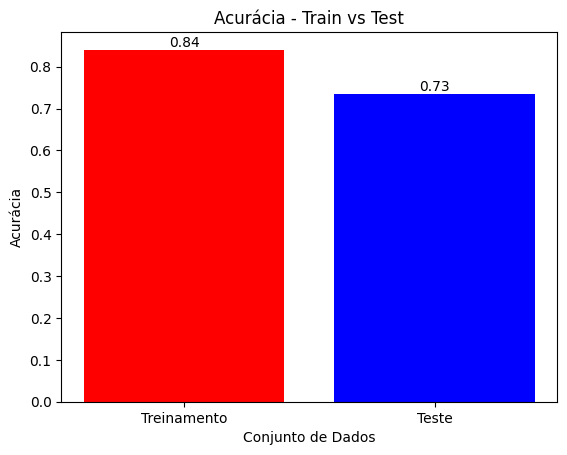

In [15]:
import matplotlib.pyplot as plt

# Configuração do gráfico
labels = ['Treinamento', 'Teste']
values = [train_accuracy, test_accuracy]
colors = ['red', 'blue']

# Plotagem do gráfico de barras
plt.bar(labels, values, color=colors)

# Adição do texto com os valores
for i, value in enumerate(values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Título e rótulos dos eixos
plt.title('Acurácia - Train vs Test')
plt.xlabel('Conjunto de Dados')
plt.ylabel('Acurácia')

# Exibição do gráfico
plt.show()

## Binary tests Bernoulli Naive Bayes

In [5]:
df.head(5)

,classification,label,tweets_pt,tweets_en,pt_lemma,en_lemma,pt_tokens,en_tokens
0,Normal,2,mayasolovely como mulher você não deve reclama...,mayasolovely woman shouldnt complain cleanin...,mayasolovelyr como mulher você não dever recla...,mayasolovely woman should not complain clea...,"['mayasolovelyr', 'como', 'mulher', 'você', 'n...","['mayasolovely', 'woman', 'should', 'not', 'co..."
1,Offensive,1,menino dats frio tyga dwn ruim para cuffin da...,boy dats coldtyga dwn bad cuffin dat hoe place,menino dats frio tyga dwn ruim para cuffin d...,boy dat coldtyga dwn bad cuffin dat hoe place,"['menino', 'dats', 'frio', 'tyga', 'dwn', 'rui...","['boy', 'dat', 'coldtyga', 'dwn', 'bad', 'cuff..."
2,Offensive,1,urkindofbrand cara você fodeu uma cadela e...,urkindofbrand dawg ever fuck bitch start c...,urkindofbrand cara você foder um cadela ...,urkindofbrand dawg ever fuck bitch start ...,"['urkindofbrand', 'cara', 'você', 'foder', 'um...","['urkindofbrand', 'dawg', 'ever', 'fuck', 'bit..."
3,Offensive,1,cganderson vivabased ela parece uma travesti,cganderson vivabased look like tranny,Cganderson Vivabased ela parecer um travesti,cganderson vivabase look like tranny,"['Cganderson', 'Vivabased', 'ela', 'parecer', ...","['cganderson', 'vivabase', 'look', 'like', 'tr..."
4,Offensive,1,shenikaroberts merda que você ouve sobre mim ...,shenikaroberts shit hear might true might ...,shenikarobert merdar que você ouve sobre eu ...,shenikarobert shit hear might true migh...,"['shenikarobert', 'merdar', 'que', 'você', 'ou...","['shenikarobert', 'shit', 'hear', 'might', 'tr..."


In [6]:
df_b = df.drop(df.loc[df['label'] == 1].index)

In [7]:
df_b

,classification,label,tweets_pt,tweets_en,pt_lemma,en_lemma,pt_tokens,en_tokens
0,Normal,2,mayasolovely como mulher você não deve reclama...,mayasolovely woman shouldnt complain cleanin...,mayasolovelyr como mulher você não dever recla...,mayasolovely woman should not complain clea...,"['mayasolovelyr', 'como', 'mulher', 'você', 'n...","['mayasolovely', 'woman', 'should', 'not', 'co..."
5,Hate Speech,0,tmadisonx merda simplesmente surpreende,tmadisonx shit blows meclaim faithful somebod...,tmadisonx merda simplesmente surpreender,tmadisonx shit blow meclaim faithful somebod...,"['tmadisonx', 'merda', 'simplesmente', 'surpre...","['tmadisonx', 'shit', 'blow', 'meclaim', 'fait..."
9,Hate Speech,0,rhythmixx hobbies incluem lutar contra mariam...,rhythmixx hobbies include fighting mariam\n\n...,rhythmixx hobbie incluir lutar contra mariam...,rhythmixx hobby include fight mariam \n\n bitch,"['rhythmixx', 'hobbie', 'incluir', 'lutar', 'c...","['rhythmixx', 'hobby', 'include', 'fight', 'ma..."
14,Hate Speech,0,puta sai cima mim,bitch get,puta sair cima eu,bitch get,"['puta', 'sair', 'cima', 'eu']","['bitch', 'get']"
17,Hate Speech,0,vadia quem você ama,bitch love,vader quem você amar,bitch love,"['vader', 'quem', 'você', 'amar']","['bitch', 'love']"
...,...,...,...,...,...,...,...,...
24766,Hate Speech,0,vocês negros traem suas namoradas smh,niggers cheat gfs smh,você negro traer seu namorado smh,nigger cheat gfs smh,"['você', 'negro', 'traer', 'seu', 'namorado', ...","['nigger', 'cheat', 'gfs', 'smh']"
24769,Hate Speech,0,vocês são todos negros,youre niggers,você ser todo negro,you re nigger,"['você', 'ser', 'todo', 'negro']","['you', 're', 'nigger']"
24770,Hate Speech,0,você retardado espero que tenha diabetes tip...,youre retard hope get type diabetes die su...,você retardar esperar que ter diabete tipo ...,you re retard hope get type diabetes die...,"['você', 'retardar', 'esperar', 'que', 'ter', ...","['you', 're', 'retard', 'hope', 'get', 'type',..."
24772,Normal,2,você foi quebrou coração errado baby deixo...,youve gone broke wrong heart baby drove redne...,você ser quebrar coração errar Baby dei...,you ve go break wrong heart baby drive redne...,"['você', 'ser', 'quebrar', 'coração', 'errar',...","['you', 've', 'go', 'break', 'wrong', 'heart',..."


In [8]:
X = df_b['pt_tokens']
X

0        ['mayasolovelyr', 'como', 'mulher', 'você', 'n...
5        ['tmadisonx', 'merda', 'simplesmente', 'surpre...
9        ['rhythmixx', 'hobbie', 'incluir', 'lutar', 'c...
14                          ['puta', 'sair', 'cima', 'eu']
17                       ['vader', 'quem', 'você', 'amar']
                               ...                        
24766    ['você', 'negro', 'traer', 'seu', 'namorado', ...
24769                     ['você', 'ser', 'todo', 'negro']
24770    ['você', 'retardar', 'esperar', 'que', 'ter', ...
24772    ['você', 'ser', 'quebrar', 'coração', 'errar',...
24775    ['babar', 'ntac', 'eileen', 'dahlia', 'lindo',...
Name: pt_tokens, Length: 8900, dtype: object

In [9]:
y = df_b['classification']
y

0             Normal
5        Hate Speech
9        Hate Speech
14       Hate Speech
17       Hate Speech
            ...     
24766    Hate Speech
24769    Hate Speech
24770    Hate Speech
24772         Normal
24775         Normal
Name: classification, Length: 8900, dtype: object

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [12]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
model = clf.fit(X_train, y_train)

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(X_test))

0.8310112359550562

In [14]:
from sklearn.metrics import classification_report


y_prob = clf.predict_proba(X_test)
# print(y_prob)
y_pred = clf.predict(X_test)
# print(y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Hate Speech       0.79      0.96      0.86      1257
      Normal       0.92      0.67      0.78       968

    accuracy                           0.83      2225
   macro avg       0.86      0.81      0.82      2225
weighted avg       0.85      0.83      0.83      2225



In [15]:
my_input = ''
my_input = vectorizer.transform([my_input])
model.predict(my_input)

array(['Hate Speech'], dtype='<U11')

In [20]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [22]:
print("Acurácia no conjunto de treinamento:", train_accuracy)
print("Acurácia no conjunto de teste:", test_accuracy)

Acurácia no conjunto de treinamento: 0.9502621722846442
Acurácia no conjunto de teste: 0.8310112359550562


In [23]:
overfitting_0 = train_accuracy - test_accuracy
overfitting = round(overfitting_0, 2)
print("Overfitting:", overfitting)

Overfitting: 0.11925093632958794


In [ ]:
import matplotlib.pyplot as plt

# Configuração do gráfico
labels = ['Treinamento', 'Teste']
values = [train_accuracy, test_accuracy]
colors = ['red', 'blue']

# Plotagem do gráfico de barras
plt.bar(labels, values, color=colors)

# Adição do texto com os valores
for i, value in enumerate(values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Título e rótulos dos eixos
plt.title('Acurácia - Train vs Test')
plt.xlabel('Conjunto de Dados')
plt.ylabel('Acurácia')

# Exibição do gráfico
plt.show()